In [1]:
from __future__ import division, print_function
import os
import re

import matplotlib.pyplot as plt
import numpy as np


100 lines read
200 lines read
300 lines read
400 lines read
500 lines read
600 lines read
700 lines read
800 lines read
900 lines read
1000 lines read
1100 lines read
1200 lines read
1300 lines read
1400 lines read
1500 lines read
1600 lines read
1700 lines read
1800 lines read
1900 lines read
2000 lines read
2100 lines read
2200 lines read
2300 lines read
2400 lines read
2500 lines read
2600 lines read
2700 lines read
2800 lines read
2900 lines read
3000 lines read
3100 lines read
3200 lines read
3300 lines read
3400 lines read
3500 lines read
3600 lines read
3700 lines read
3800 lines read
3900 lines read
4000 lines read
4100 lines read
4200 lines read
4300 lines read
4400 lines read
4500 lines read
4600 lines read
4700 lines read
4800 lines read
4900 lines read
5000 lines read
5100 lines read
5200 lines read
5300 lines read
5400 lines read
5500 lines read
5600 lines read
5700 lines read
5800 lines read
5900 lines read
6000 lines read
6100 lines read
6200 lines read
6300 lines read
6

49200 lines read
49300 lines read
49400 lines read
49500 lines read
49600 lines read
49700 lines read
49800 lines read
49900 lines read
50000 lines read
50100 lines read
50200 lines read
50300 lines read
50400 lines read
50500 lines read
50600 lines read
50700 lines read
50800 lines read
50900 lines read
51000 lines read
51100 lines read
51200 lines read
51300 lines read
51400 lines read
51500 lines read
51600 lines read
51700 lines read
51800 lines read
51900 lines read
52000 lines read
52100 lines read
52200 lines read
52300 lines read
52400 lines read
52500 lines read
52600 lines read
52700 lines read
52800 lines read
52900 lines read
53000 lines read
53100 lines read
53200 lines read
53300 lines read
53400 lines read
53500 lines read
53600 lines read
53700 lines read
53800 lines read
53900 lines read
54000 lines read
54100 lines read
54200 lines read
54300 lines read
54400 lines read
54500 lines read
54600 lines read
54700 lines read
54800 lines read
54900 lines read
55000 lines re

97500 lines read
97600 lines read
97700 lines read
97800 lines read
97900 lines read
98000 lines read
98100 lines read
98200 lines read
98300 lines read
98400 lines read
98500 lines read
98600 lines read
98700 lines read
98800 lines read
98900 lines read
99000 lines read
99100 lines read
99200 lines read
99300 lines read
99400 lines read
99500 lines read
99600 lines read
99700 lines read
99800 lines read
99900 lines read
100000 lines read
100100 lines read
100200 lines read
100300 lines read
100400 lines read
100500 lines read
100600 lines read
100700 lines read
100800 lines read
100900 lines read
101000 lines read
101100 lines read
101200 lines read
101300 lines read
101400 lines read
101500 lines read
101600 lines read
101700 lines read
101800 lines read
101900 lines read
102000 lines read
102100 lines read
102200 lines read
102300 lines read
102400 lines read
102500 lines read
102600 lines read
102700 lines read
102800 lines read
102900 lines read
103000 lines read
103100 lines read

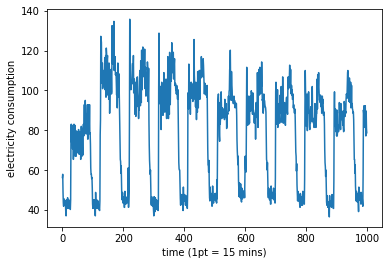

In [4]:
DATA_DIR = "./data"

with open(os.path.join(DATA_DIR, "LD2011_2014.txt"), "r") as fld:
    data = []
    cid = 250
    for line_num, line in enumerate(fld):
        if line.startswith("\"\";"):
            continue
        if line_num % 100 == 0:
            print("{:d} lines read".format(line_num))
        cols = [float(re.sub(",", ".", x)) for x in
                line.strip().split(";")[1:]]
        data.append(cols[cid])

NUM_ENTRIES = 1000
plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES])
plt.ylabel("electricity consumption")
plt.xlabel("time (1pt = 15 mins)")
plt.show()

np.save(os.path.join(DATA_DIR, "LD_250.npy"), np.array(data))

In [2]:
from __future__ import division, print_function
import math
import os

import numpy as np
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
C:\Users\hmasa\Anaconda3\envs\tf-keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hmasa\Anaconda3\envs\tf-keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hmasa\Anaconda3\envs\tf-keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hmasa\Anaconda3\envs\tf-keras

In [3]:
DATA_DIR = "./data"

data = np.load(os.path.join(DATA_DIR, "LD_250.npy"))

In [4]:
# パラメータ設定
STATELESS = True

NUM_TIMESTEPS = 20
HIDDEN_SIZE = 10
BATCH_SIZE = 96  # 24 hours (15 min intervals)
NUM_EPOCHS = 5


In [5]:
# scale the data to be in the range (0, 1)
# データのスケーリング
## minMax scaler
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1), copy=False)
data = scaler.fit_transform(data)

In [6]:
# transform to 4 inputs -> 1 label format
#　データの整形
# 各バッチで15分間隔の値の系列を取り、次の値を予測していく
X = np.zeros((data.shape[0], NUM_TIMESTEPS))
Y = np.zeros((data.shape[0], 1))
for i in range(len(data) - NUM_TIMESTEPS - 1):
    X[i] = data[i:i + NUM_TIMESTEPS].T
    Y[i] = data[i + NUM_TIMESTEPS + 1]

# reshape X to three dimensions (samples, timesteps, features)
X = np.expand_dims(X, axis=2)

# split into training and test sets (add the extra offsets so
# we can use batch size of 5)
# 学習データと検証データを分割7:3（時系列順）
sp = int(0.7 * len(data))
Xtrain, Xtest, Ytrain, Ytest = X[0:sp], X[sp:], Y[0:sp], Y[sp:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(98179, 20, 1) (42077, 20, 1) (98179, 1) (42077, 1)


## stateFull

In [7]:
STATELESS = False

In [8]:
if STATELESS:
    # stateless
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1),
                   return_sequences=False))
    model.add(Dense(1))
else:
    # stateful
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, stateful=True, # statefulをtrueにしておく
                   batch_input_shape=(BATCH_SIZE, NUM_TIMESTEPS, 1),# 明示的にバッチsizeを記述している
                   return_sequences=False))
    model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam",
              metrics=["mean_squared_error"])

In [9]:
if STATELESS:
    # stateless
    model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
              validation_data=(Xtest, Ytest),
              shuffle=False)
else:
    # stateful
    # need to make training and test data to multiple of BATCH_SIZE
    train_size = (Xtrain.shape[0] // BATCH_SIZE) * BATCH_SIZE#　バッチsizeの倍数になるように最後の数個のレコード切り捨てている
    test_size = (Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
    Xtrain, Ytrain = Xtrain[0:train_size], Ytrain[0:train_size]
    Xtest, Ytest = Xtest[0:test_size], Ytest[0:test_size]
    print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
    for i in range(NUM_EPOCHS):# 手動でエポックをループさせている（エポックごとにリセットする必要があるため）
        print("Epoch {:d}/{:d}".format(i+1, NUM_EPOCHS))
        model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=1,
                  validation_data=(Xtest, Ytest),
                  shuffle=False)# shuffleさせない
        model.reset_states()# リセット

(98112, 20, 1) (42048, 20, 1) (98112, 1) (42048, 1)
Epoch 1/5

Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 21s 212us/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 2/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 21s 212us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 21s 209us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/5
Train on 98112 samples, validate on 42048 samples
Epoch 1/1
98112/98112 [==============================] - 21s 212us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5/5
Train on 98112 samples, v

In [10]:
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))

42048/42048 [==============================] - 4s 89us/step

MSE: 0.004, RMSE: 0.060


## stateless

In [11]:
STATELESS = True

In [12]:
if STATELESS:
    # stateless
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1),
                   return_sequences=False))
    model.add(Dense(1))
else:
    # stateful
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, stateful=True,
                   batch_input_shape=(BATCH_SIZE, NUM_TIMESTEPS, 1),
                   return_sequences=False))
    model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam",
              metrics=["mean_squared_error"])

In [13]:
if STATELESS:
    # stateless
    model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
              validation_data=(Xtest, Ytest),
              shuffle=False)
else:
    # stateful
    # need to make training and test data to multiple of BATCH_SIZE
    train_size = (Xtrain.shape[0] // BATCH_SIZE) * BATCH_SIZE
    test_size = (Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
    Xtrain, Ytrain = Xtrain[0:train_size], Ytrain[0:train_size]
    Xtest, Ytest = Xtest[0:test_size], Ytest[0:test_size]
    print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
    for i in range(NUM_EPOCHS):
        print("Epoch {:d}/{:d}".format(i+1, NUM_EPOCHS))
        model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=1,
                  validation_data=(Xtest, Ytest),
                  shuffle=False)
        model.reset_states()

Train on 98112 samples, validate on 42048 samples
Epoch 1/5
98112/98112 [==============================] - 22s 220us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 2/5
98112/98112 [==============================] - 21s 215us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/5
98112/98112 [==============================] - 21s 212us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/5
98112/98112 [==============================] - 21s 214us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/5
98112/98112 [==============================] - 21s 216us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


In [14]:
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))

42048/42048 [==============================] - 4s 95us/step

MSE: 0.004, RMSE: 0.059


精度はそんなに変わらない